### Задача uplift-моделирования

### План занятия

* Введение: коммуникация с пользователями
* Дизайн эксперимента
* Типы клиентов
* Одна модель с дополнительным признаком
* Вариант с двумя независимыми моделями
* Вариант с двумя зависимыми моделями
* Прямой расчет uplift: "деревянные" модели
* Ссылки

### Введение

Часто возникает необходимость коммуникации с пользователями для продвижения сервисов и услуг.

Коммуникация осуществляется с помощью различных каналов: смс, звонки, push-уведомления, сообщения в чатботе и т.д

Например, мы хотим отправить push-уведомление игрокам в мобильной игре о том, что у них заполнились склады или об ином внутриигровом событии. Либо даже хотим отправить уведомление о наступающем внутриигровом эвенте (которые очень важны для активных игроков и для монетизации и развития игры в целом).

Другой пример:

Мы хотим прорекламировать популярный продукт, но при этом не хотим тратить бюджет на коммуникацию с пользователями, которые и без нас его купят. 

Изначально вопрос у нас такой: <b>Какова вероятность, что пользователь совершит нужное нам действие?</b>

Но нам нужен ответ не на него.

### Пример - задача прогнозирования оттока

Подробно задачу будем разбирать на следующем занятии, но давайте договоримся, что решать мы ее уже умеем.

Т.е мы для пользователей нашего сервиса можем посчитать вероятность ухода в отток.

![ab_split](churn.png "churn1")

Мы можем для пользователя определить вероятность:

P(User)

Мы хотим удерживать наших пользователей, которые чем-то недовольны или несчастны и хотим им предложить более выгодные условия подписки или тарифа (например, если мы - мобильный оператор, то мы можем предложить нашим абонентам более выгодный тариф).

Хорошо, мы можем отобрать из нашей аудитории наиболее "несчастных". Почему бы просто не сделать им предложение? В чем проблема? 

Проблема в том, что разные пользователи реагируют на коммуникацию по-разному и каждое взаимодействие стоит для нас денег.

И еще проблема - <b>наша модель неидеальна!</b>

#### Типы пользователей по реакции на коммуникацию

![ab_split](uplift_client_types.png "uplift_client_types")

1. Пользователи, которые совершат нужное действие независимо от коммуникации
2. Те, кто совершат действие, если будет коммуникация
3. Те, кто не совершит действие независимо от коммуникации
4. Не совершат действие, если коммуникация будет

Для оптимизации эффекта от воздействия хочется посчитать разницу реакций пользователя при наличии коммуникации и при ее отсутствии. 

Проблема в том, что мы не можем одновременно совершить коммуникацию и не совершить коммуникацию.

![ab_split](uplift2.png "uplift_cats")

Что же делать?

Необходимо оценить разницу между двумя событиями, которые являются взаимоисключающими для конкретного пользователя.

Для этого нам нужна обучающая выборка. А для нее нужно просто провести эксперимент. 

1. Берем часть базы пользователей и разбиваем на 2 группы: контрольную и экспериментальную
2. На экспериментальной группе запускаем маркетинговую кампанию (совершаем коммуникацию)
3. Через какое-то время у нас есть результаты совершения нужного действия клиентами в обеих группах (включая контрольную)
4. Проводим uplift-моделирование

![ab_split](uplift_3.png "uplift3")

![ab_split](uplift_scheme.png "uplift_scheme")

*взято из https://habr.com/ru/company/ru_mts/blog/485980/

### Пример модели с дополнительным признаком

Другие названия: Treatment Dummy approach, Solo model approach, Single model approach, S-Learner 

![ab_split](uplift_single_model.png "uplift_single_model")

### Две независимые модели

Другие названия: Two models approach, T-learner, difference two models

Интуитивно понятный и простой метод - моделируем 2 условные вероятности

1. обучаем модель прогноза вероятности совершения целевого действия для контрольной группы
2. обучаем модель прогноза вероятности совершения целевого действия для экспериментальной группы
3. на прогнозе - делаем прогноз для тестовых пользователей двумя моделями и вычитаем из прогноза второй модели прогноз первой

![ab_split](uplift_2models.png "uplift_2models")

p(y=1|w=1), p(y=1|w=0)

[Текст ссылки](https://)### ПЕРЕРЫВ ДО 20:50
 (МСК)

### Практический пример с соревнования X5 

http://retailhero.ai/#rec141268104

Импортируем нужные библиотеки и предобработаем данные:

In [1]:
#pip install scikit-uplift catboost==0.22 -U
#pip install causalml

In [5]:
#from google.colab import drive
#drive.mount('/gdrive')

In [50]:
path = '/gdrive/MyDrive/2_ver_actual Артем Зраев. 10.2020/Lection4/uplift_data/'

In [51]:
%matplotlib inline

import pandas as pd; pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split


# Чтение данных
df_clients = pd.read_csv(path +'clients.csv', index_col='client_id')
df_train = pd.read_csv(path +'uplift_train.csv', index_col='client_id')
df_test = pd.read_csv(path +'uplift_test.csv', index_col='client_id')

# Извлечение признаков
df_features = df_clients.copy()
df_features['first_issue_time'] = \
    (pd.to_datetime(df_features['first_issue_date'])
     - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
df_features['first_redeem_time'] = \
    (pd.to_datetime(df_features['first_redeem_date'])
     - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
df_features['issue_redeem_delay'] = df_features['first_redeem_time'] \
    - df_features['first_issue_time']
df_features = df_features.drop(['first_issue_date', 'first_redeem_date'], axis=1)
# разбираем примеры на 2 группы : train /val - пока только по индексам клиентов
indices_train = df_train.index  # индексы, для которых знаем результат  
indices_test = df_test.index # индексы, для которых не знаем результат (можем просто дать модели поработать потом)
indices_learn, indices_valid = train_test_split(df_train.index, test_size=0.3, random_state=123) # разбили известный набор на 2 части

In [52]:
df_clients

,first_issue_date,first_redeem_date,age,gender
client_id,,,,
000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U
000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
000048b7a6,2018-12-15 13:33:11,NaN,68,F
000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,F
00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,U
...,...,...,...,...
fffece623e,2018-05-13 15:09:30,2018-12-27 19:06:39,67,U
ffff3dfff8,2018-11-01 16:06:52,2018-12-07 17:33:47,56,F
ffffaab9da,2017-08-25 18:43:24,2017-12-08 17:53:19,23,F


In [53]:
df_features.head()


,age,gender,first_issue_time,first_redeem_time,issue_redeem_delay
client_id,,,,,
000012768d,45,U,1501947648,1.515094e+09,13146559.0
000036f903,72,F,1491832463,1.492951e+09,1118613.0
000048b7a6,68,F,1544880791,NaN,NaN
000073194a,60,F,1495544174,1.511522e+09,15978107.0
00007c7133,67,U,1495469828,1.546277e+09,50806825.0


In [54]:
df_test.head(3)

""
client_id
000048b7a6
000073194a
00007c7133


In [55]:
df_train

,treatment_flg,target
client_id,,
000012768d,0,1
000036f903,1,1
00010925a5,1,1
0001f552b0,1,1
00020e7b18,1,1
...,...,...
fffe0abb97,0,0
fffe0ed719,0,1
fffea1204c,0,1


Посмотрим на целевое свойство:

In [56]:
df_train.groupby("treatment_flg")['target'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment_flg,,,,,,,,
0,100058.0,0.603280,0.489219,0.0,0.0,1.0,1.0,1.0
1,99981.0,0.636511,0.481006,0.0,0.0,1.0,1.0,1.0


Заведем переменные для работы uplift модели

In [57]:
# данные для обучения
X_train = df_features.loc[indices_learn, :] # признаки о клиенте (в них остались только описания клиентов )
y_train = df_train.loc[indices_learn, 'target'] #целевой признак (те кто сделал правильное действие)
treat_train = df_train.loc[indices_learn, 'treatment_flg']  #те кому написали смс с предложением
#данные для валидации
X_val = df_features.loc[indices_valid, :]
y_val = df_train.loc[indices_valid, 'target']
treat_val =  df_train.loc[indices_valid, 'treatment_flg']
#весь набор целиком
X_train_full = df_features.loc[indices_train, :]
y_train_full = df_train.loc[:, 'target']
treat_train_full = df_train.loc[:, 'treatment_flg']
#данные из теста (слепые)
X_test = df_features.loc[indices_test, :]
# наш категорийный признак
cat_features = ['gender']
# словарь для записывания результатов
models_results = {
    'approach': [],
    'uplift@30%': []
}

Описание клиента:

In [58]:
X_train.head()

,age,gender,first_issue_time,first_redeem_time,issue_redeem_delay
client_id,,,,,
ad6561e2d8,50,F,1512322431,1.527102e+09,14779510.0
7c1ccbf93f,24,F,1510331629,1.519326e+09,8994516.0
b58fadcab6,36,U,1509657465,1.537045e+09,27387871.0
e99e6fabb9,79,F,1526466080,1.527713e+09,1247284.0
27fb6f8520,34,F,1500320188,1.513332e+09,13012137.0


Описание воздействия:

In [59]:
treat_train

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
             ..
999d284453    1
f634deea4e    0
16cb4f99b0    0
23c2b72b2e    1
1430184499    0
Name: treatment_flg, Length: 140027, dtype: int64

Описание нужного действия (сделал/не сделал)

In [60]:
y_train

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
             ..
999d284453    1
f634deea4e    1
16cb4f99b0    1
23c2b72b2e    1
1430184499    1
Name: target, Length: 140027, dtype: int64

In [61]:
from sklearn.utils.validation import check_consistent_length
import matplotlib.pyplot as plt

# замена для родной функции из skuplift
def plot_uplift_preds_(trmnt_preds, ctrl_preds, log=False, bins=100):
    """Plot histograms of treatment, control and uplift predictions.

    Args:
        trmnt_preds (1d array-like): Predictions for all observations if they are treatment.
        ctrl_preds (1d array-like): Predictions for all observations if they are control.
        log (bool): Logarithm of source samples. Default is False.
        bins (integer or sequence): Number of histogram bins to be used. Default is 100.
            If an integer is given, bins + 1 bin edges are calculated and returned.
            If bins is a sequence, gives bin edges, including left edge of first bin and right edge of last bin.
            In this case, bins is returned unmodified. Default is 100.

    Returns:
        Object that stores computed values.
    """

    # TODO: Add k as parameter: vertical line on plots
    check_consistent_length(trmnt_preds, ctrl_preds)
  
    if not isinstance(bins, int) or bins <= 0:
        raise ValueError(
            f'Bins should be positive integer. Invalid value for bins: {bins}')

    if log:
        trmnt_preds = np.log(trmnt_preds + 1)
        ctrl_preds = np.log(ctrl_preds + 1)

    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 7))
    axes[0].hist(
        trmnt_preds, bins=bins, alpha=0.3, color='b', label='Treated', histtype='stepfilled')
    axes[0].set_ylabel('Probability hist')
    axes[0].legend()
    axes[0].set_title('Treatment predictions')

    axes[1].hist(
        ctrl_preds, bins=bins, alpha=0.5, color='y', label='Not treated', histtype='stepfilled')
    axes[1].legend()
    axes[1].set_title('Control predictions')

    axes[2].hist(
        trmnt_preds - ctrl_preds, bins=bins, alpha=0.5, color='green', label='Uplift', histtype='stepfilled')
    axes[2].legend()
    axes[2].set_title('Uplift predictions')

    return axes

### 1. Подходы с одной моделью
#### 1.1 Одна модель с признаком коммуникации
Самое простое и интуитивное решение: модель обучается одновременно на двух группах, при этом бинарный флаг коммуникации выступает в качестве дополнительного признака. Каждый объект из тестовой выборки скорим дважды: с флагом коммуникации равным 1 и равным 0. Вычитая вероятности по каждому наблюдению, получим искомы uplift.

![ab_split](uplift4.png "uplift4")

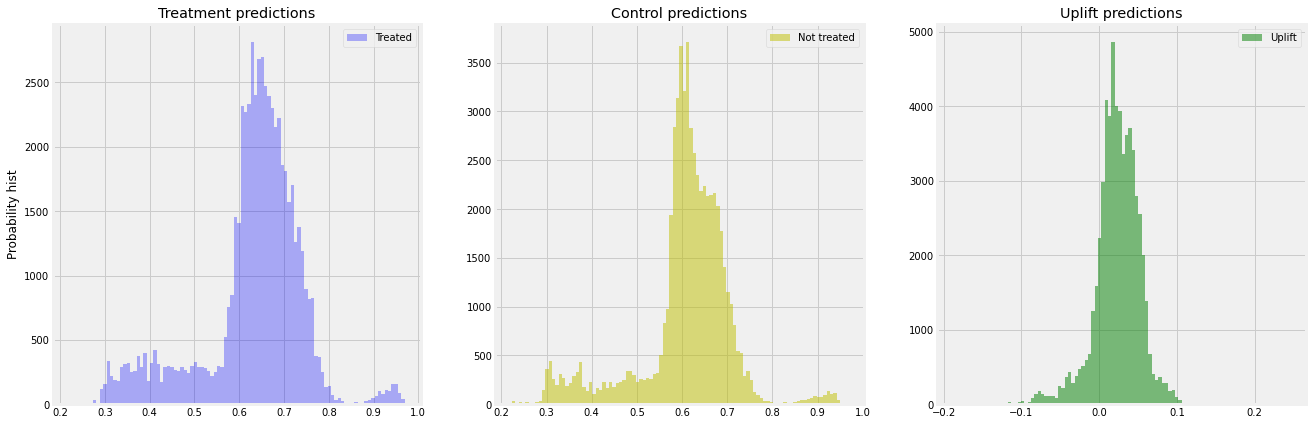

In [62]:
# Инструкция по установке пакета: https://github.com/maks-sh/scikit-uplift
# Ссылка на документацию: https://scikit-uplift.readthedocs.io/en/latest/
from sklift.metrics import uplift_at_k
from sklift.viz import plot_uplift_preds ## в новой версии проблема (беру свой вариант)
from sklift.models import SoloModel

# sklift поддерживает любые модели, 
# которые удовлетворяют соглашениями scikit-learn
# Для примера воспользуемся catboost
from catboost import CatBoostClassifier

N =20000
sm = SoloModel(   CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
sm = sm.fit(   X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})

uplift_sm = sm.predict(X_val)

# размер uplift на топ k процентах выборки
sm_score = uplift_at_k( y_true=y_val, uplift=uplift_sm, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('SoloModel')
models_results['uplift@30%'].append(sm_score)

# Получим условные вероятности выполнения целевого действия при взаимодействии для каждого объекта
sm_trmnt_preds = sm.trmnt_preds_
# И условные вероятности выполнения целевого действия без взаимодействия для каждого объекта
sm_ctrl_preds = sm.ctrl_preds_

# Отрисуем распределения вероятностей и их разность (uplift)
plot_uplift_preds_(   sm_trmnt_preds , sm_ctrl_preds, bins=100);#ctrl_preds=

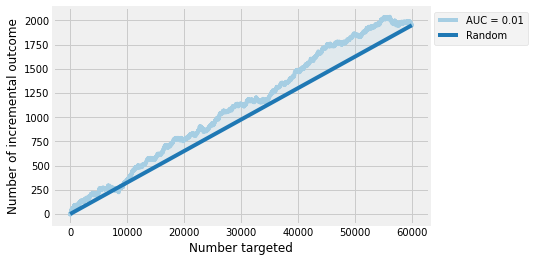

In [63]:
from sklift.viz import plot_uplift_curve


# with ideal curve
# perfect=True
plot_uplift_curve(y_val, uplift_sm, treat_val, perfect=False); # perfect=True

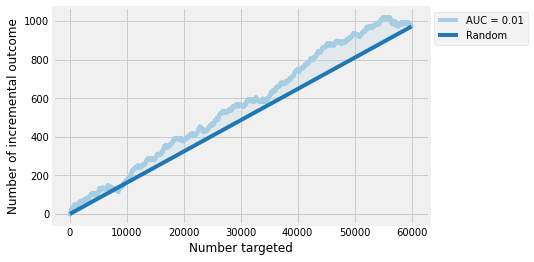

In [64]:
from sklift.viz import plot_qini_curve


# with ideal Qini curve (red line)
# perfect=True
plot_qini_curve(y_val, uplift_sm, treat_val, perfect=False);

In [65]:
from sklift.metrics import qini_auc_score


# коэффициент qini, или area under qini curve (AUQC)
auqc = qini_auc_score(y_val, uplift_sm, treat_val) 
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.0055


In [66]:
from sklift.metrics import uplift_by_percentile

# uplift by decile, или  uplift by percentile, или uplift by bin.
uplift_by_percentile(y_val, uplift_sm,  treat_val, 
                     strategy='overall', 
                     total=True, std=True, bins=10)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


,n_treatment,n_control,response_rate_treatment,response_rate_control,uplift,std_treatment,std_control,std_uplift
percentile,,,,,,,,
0-10,3008,2994,0.689495,0.646627,0.042868,0.008436,0.008736,0.012145
10-20,3017,2985,0.669208,0.629481,0.039727,0.008566,0.008839,0.012309
20-30,3012,2989,0.680279,0.640013,0.040266,0.008498,0.008780,0.012219
30-40,2969,3032,0.649040,0.627968,0.021072,0.008759,0.008778,0.012401
40-50,2978,3023,0.650437,0.605690,0.044747,0.008738,0.008888,0.012464
50-60,3130,2871,0.654633,0.631139,0.023494,0.008499,0.009005,0.012382
60-70,3033,2968,0.627102,0.579178,0.047924,0.008781,0.009062,0.012618
70-80,3045,2956,0.623645,0.587957,0.035689,0.008780,0.009053,0.012611
80-90,2951,3050,0.585564,0.557705,0.027859,0.009068,0.008993,0.012772


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


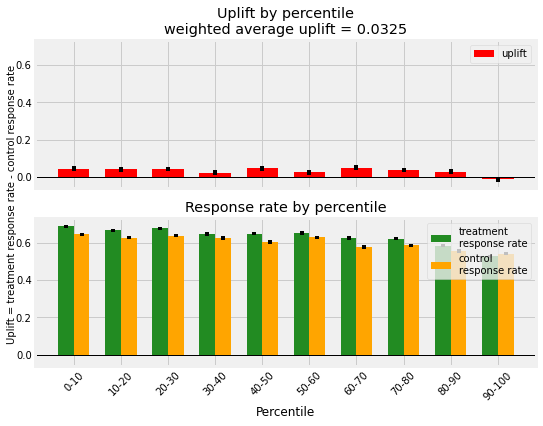

In [67]:
from sklift.viz import plot_uplift_by_percentile

# график uplift by percentile
plot_uplift_by_percentile(y_val, uplift_sm, treat_val, 
                          strategy='overall', kind='bar'); # line

В левой части графика находятся убеждаемые — тот тип, которых мы хотим найти. 

В терминах целевого действия и коммуникации это Y=1 при W=1 и Y=0 при W=0.


Еще метрики:

In [68]:
from sklift.metrics import weighted_average_uplift

# с помощью значений в столбцах uplift и n_treatment рассчитаем усредненный uplift на всей выборке, 
# взвешенный на размер целевой группы — weighted average uplift
uplift_full_data = weighted_average_uplift(y_val, uplift_sm, 
                                            treat_val, bins=10) 
print(f"weighted average uplift on full data: {uplift_full_data:.4f}")

weighted average uplift on full data: 0.0313


Посмотрим на топ-признаки

In [69]:
# С той же легкостью можно обратиться к обученной модели.
# Например, чтобы построить важность признаков:
sm_fi = pd.DataFrame({
    'feature_name': sm.estimator.feature_names_,
    'feature_score': sm.estimator.feature_importances_
}).sort_values('feature_score', ascending=False).reset_index(drop=True)

sm_fi

,feature_name,feature_score
0,first_redeem_time,65.214393
1,issue_redeem_delay,12.564364
2,age,7.891613
3,first_issue_time,7.262806
4,treatment,4.362077
5,gender,2.704747


#### 1.2 Трансформация классов
Достаточно интересный и математически подтвержденный подход к построению модели, представленный еще в 2012 году. Метод заключается в прогнозировании немного измененного таргета:

![ab_split](uplift5.png "uplift5")

![ab_split](uplift_client_types.png "uplift_client_types")

In [70]:
from sklift.models import ClassTransformation


ct = ClassTransformation(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
ct = ct.fit(X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})

uplift_ct = ct.predict(X_val)

ct_score = uplift_at_k(y_true=y_val, uplift=uplift_ct, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('ClassTransformation')
models_results['uplift@30%'].append(ct_score)

#### 2.1 Две независимые модели
Как понятно из названия, подход заключается в моделировании условных вероятностей тестовой и контрольной групп отдельно. В статьях утверждается, что такой подход достаточно слабый, так как обе модели фокусируются на прогнозировании результата отдельно и поэтому могут пропустить "более слабые" различия в выборках.

![ab_split](uplift6.png "uplift6")

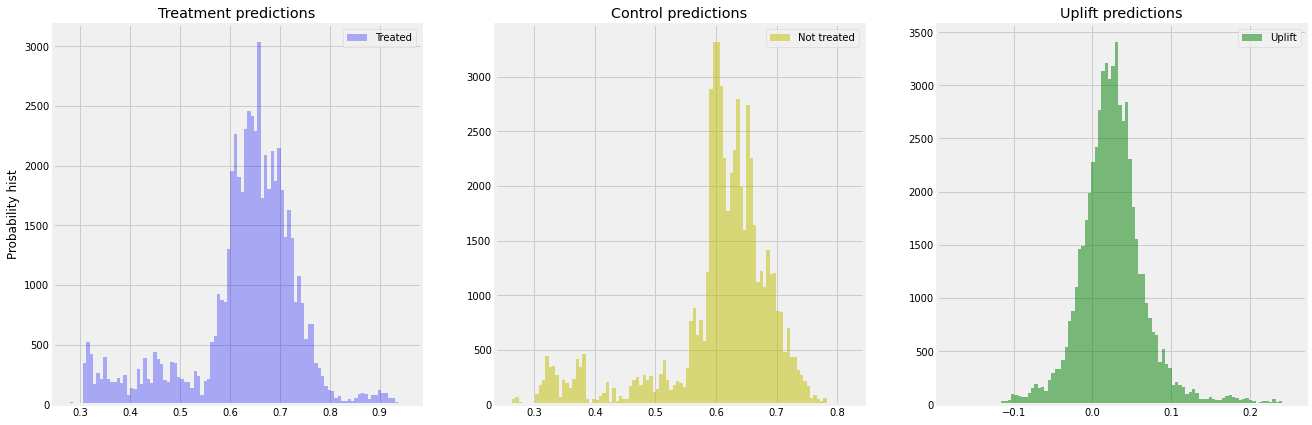

In [71]:
from sklift.models import TwoModels


tm = TwoModels(  
    estimator_trmnt=CatBoostClassifier(iterations=10, thread_count=2, random_state=42, silent=True), 
    estimator_ctrl=CatBoostClassifier(iterations=10, thread_count=2, random_state=42, silent=True), 
    method='vanilla'
)   

# method ='ddr_control' ('ddr_treatment') - зависимые модели
tm = tm.fit(
    X_train, y_train, treat_train,
    estimator_trmnt_fit_params={'cat_features': cat_features}, 
    estimator_ctrl_fit_params={'cat_features': cat_features}
)

uplift_tm = tm.predict(X_val)

tm_score = uplift_at_k(y_true=y_val, uplift=uplift_tm, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('TwoModels')
models_results['uplift@30%'].append(tm_score)

plot_uplift_preds_(trmnt_preds=tm.trmnt_preds_, ctrl_preds=tm.ctrl_preds_);

Посмотрим на результаты

In [72]:
pd.DataFrame(data=models_results).sort_values('uplift@30%', ascending=False)

,approach,uplift@30%
1,ClassTransformation,0.061775
2,TwoModels,0.051443
0,SoloModel,0.041614


Solo Model


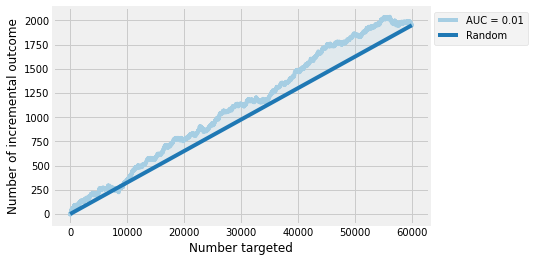

Two Model


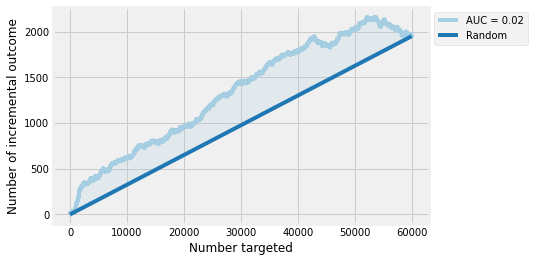

ClassTransform Model


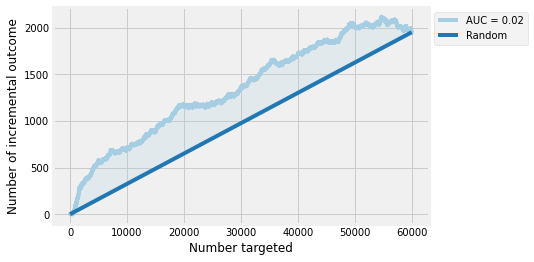

In [73]:
print('Solo Model')

plot_uplift_curve(y_val, uplift_sm, treat_val, perfect=False)
plt.show()
print('Two Model')
plot_uplift_curve(y_val, uplift_tm, treat_val, perfect=False)
plt.show()
print('ClassTransform Model')
plot_uplift_curve(y_val, uplift_ct, treat_val, perfect=False)
plt.show()




In [74]:
from sklift.metrics import uplift_by_percentile

uplift_by_percentile(y_val,uplift_ct, treat_val, 
                     strategy='overall', 
                     total=True, std=True, bins=10)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


,n_treatment,n_control,response_rate_treatment,response_rate_control,uplift,std_treatment,std_control,std_uplift
percentile,,,,,,,,
0-10,3315,2687,0.764706,0.666915,0.097791,0.007367,0.009092,0.011703
10-20,2946,3056,0.679226,0.656086,0.023140,0.008600,0.008593,0.012157
20-30,2944,3057,0.646060,0.600589,0.045471,0.008813,0.008858,0.012496
30-40,3045,2956,0.639409,0.622463,0.016946,0.008702,0.008916,0.012459
40-50,2929,3072,0.633322,0.606445,0.026877,0.008904,0.008814,0.012529
50-60,2974,3027,0.630800,0.584737,0.046063,0.008849,0.008956,0.012591
60-70,2997,3004,0.601602,0.577563,0.024038,0.008943,0.009012,0.012696
70-80,2992,3009,0.620321,0.594217,0.026104,0.008872,0.008952,0.012604
80-90,2998,3003,0.591061,0.574093,0.016968,0.008979,0.009023,0.012730


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


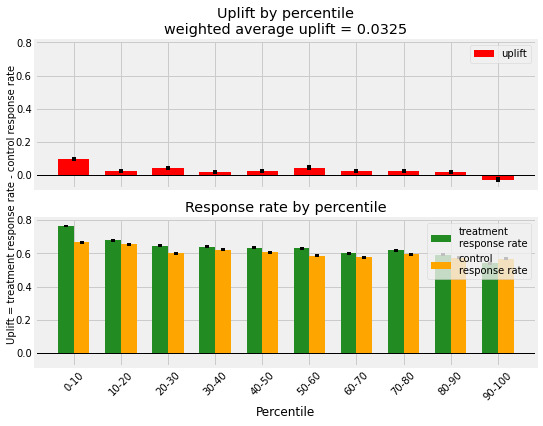

In [75]:
plot_uplift_by_percentile(y_val, uplift_ct, treat_val, 
                          strategy='overall', kind='bar'); # line

#### Вариант с деревом решений

In [76]:
X_train_tree = pd.concat([X_train.drop('gender', 1), 
                          pd.get_dummies(X_train['gender'], prefix='gender')], 1)
X_val_tree = pd.concat([X_val.drop('gender', 1), 
                          pd.get_dummies(X_val['gender'], prefix='gender')], 1)
features = [col for col in X_train_tree]

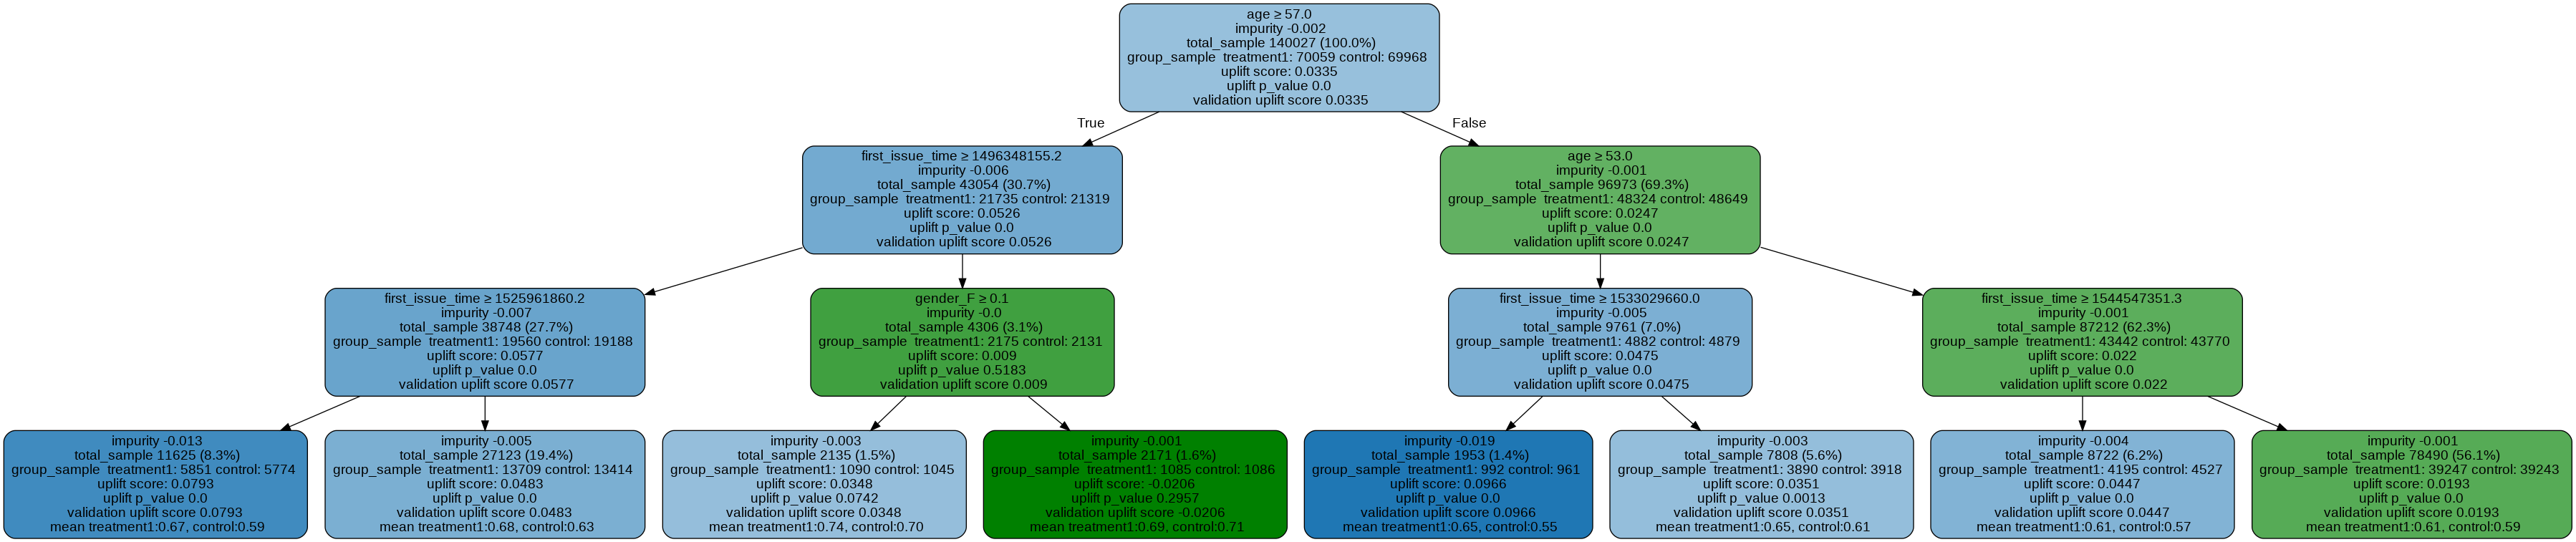

CPU times: user 6.4 s, sys: 95.8 ms, total: 6.5 s
Wall time: 6.75 s


In [77]:
%%time
from IPython.display import Image, display
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

uplift_model = UpliftTreeClassifier(max_depth=4, min_samples_leaf=200, min_samples_treatment=50,
                                    n_reg=100, evaluationFunction='KL', control_name='control')

uplift_model.fit(X_train_tree.values,
                 treatment=treat_train.map({1: 'treatment1', 0: 'control'}).values,
                 y=y_train)

graph = uplift_tree_plot(uplift_model.fitted_uplift_tree, features)
display(Image(graph.create_png()))

In [78]:
y_tree = uplift_model.predict(X_val_tree.values)

In [79]:
y_tree[1][:5]

[0.612786, 0.679772, 0.612786, 0.612786, 0.672022]

In [80]:
import numpy as np
tree_lift =  y_tree[1]

uplift_tree_30 = uplift_at_k(y_val, tree_lift, treat_val,  strategy='by_group')
print(f'uplift@30%: {uplift_tree_30:.4f}')
models_results['approach'].append('TreeModels')
models_results['uplift@30%'].append(uplift_tree_30)

uplift@30%: 0.0393


Tree Model


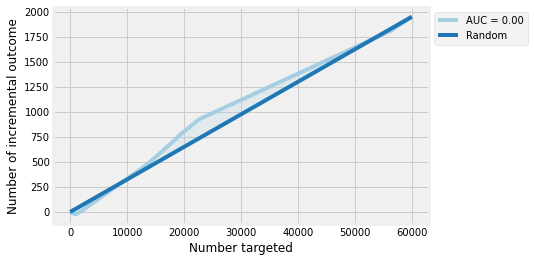

In [81]:
print('Tree Model')
plot_uplift_curve(y_val, tree_lift, treat_val, perfect=False)
plt.show()

In [82]:
models_results['approach'].append('Tree')
models_results['uplift@30%'].append(uplift_tree_30)

Смотрим на "лесе":

In [83]:



# Train uplift RandomForest
uplift_model_RF = UpliftRandomForestClassifier(n_estimators=5, max_depth = 5, min_samples_leaf = 200, min_samples_treatment = 50, n_reg = 100, evaluationFunction='KL', control_name='control')

uplift_model_RF.fit(X_train_tree.values,
                 treatment=treat_train.map({1: 'treatment1', 0: 'control'}).values,
                 y=y_train)

In [84]:
y_tree_RF = uplift_model_RF.predict(X_val_tree.values)
tree_lift_RF =  y_tree_RF[:,0]

uplift_treeRF_30 = uplift_at_k(y_val, tree_lift_RF, treat_val,  strategy='by_group')
print(f'uplift@30%: {uplift_treeRF_30:.4f}')
models_results['approach'].append('TreeModels')
models_results['uplift@30%'].append(uplift_treeRF_30)



uplift@30%: 0.0399


In [85]:
pd.DataFrame(data=models_results).sort_values('uplift@30%', ascending=False)

,approach,uplift@30%
1,ClassTransformation,0.061775
2,TwoModels,0.051443
0,SoloModel,0.041614
5,TreeModels,0.039946
3,TreeModels,0.039287
4,Tree,0.039287


Одно дерево леса:

In [86]:

# Specify a tree in the random forest (the index can be any integer from 0 to n_estimators-1)
uplift_tree = uplift_model_RF.uplift_forest[1]
# Print uplift tree as a string
result = uplift_tree_string(uplift_tree.fitted_uplift_tree, X_train_tree.columns)

first_issue_timetreatment_group_key >= 1535729851.0?
yes -> agetreatment_group_key >= 28.0?
		yes -> agetreatment_group_key >= 30.0?
				yes -> agetreatment_group_key >= 60.0?
						yes -> {'control': 0.594086, 'treatment1': 0.696131}
						no  -> {'control': 0.558222, 'treatment1': 0.627551}
				no  -> first_issue_timetreatment_group_key >= 1539631923.0?
						yes -> {'control': 0.559113, 'treatment1': 0.598234}
						no  -> {'control': 0.580645, 'treatment1': 0.491803}
		no  -> first_issue_timetreatment_group_key >= 1537272704.0?
				yes -> agetreatment_group_key >= 18.0?
						yes -> {'control': 0.565217, 'treatment1': 0.587898}
						no  -> {'control': 0.552707, 'treatment1': 0.657609}
				no  -> agetreatment_group_key >= 20.0?
						yes -> {'control': 0.728571, 'treatment1': 0.462687}
						no  -> {'control': 0.62037, 'treatment1': 0.609023}
no  -> gender_Ftreatment_group_key >= 0.1?
		yes -> agetreatment_group_key >= 33.0?
				yes -> agetreatment_group_key >= 34.0?
						yes -> {

Покажем, что за что тут работало:

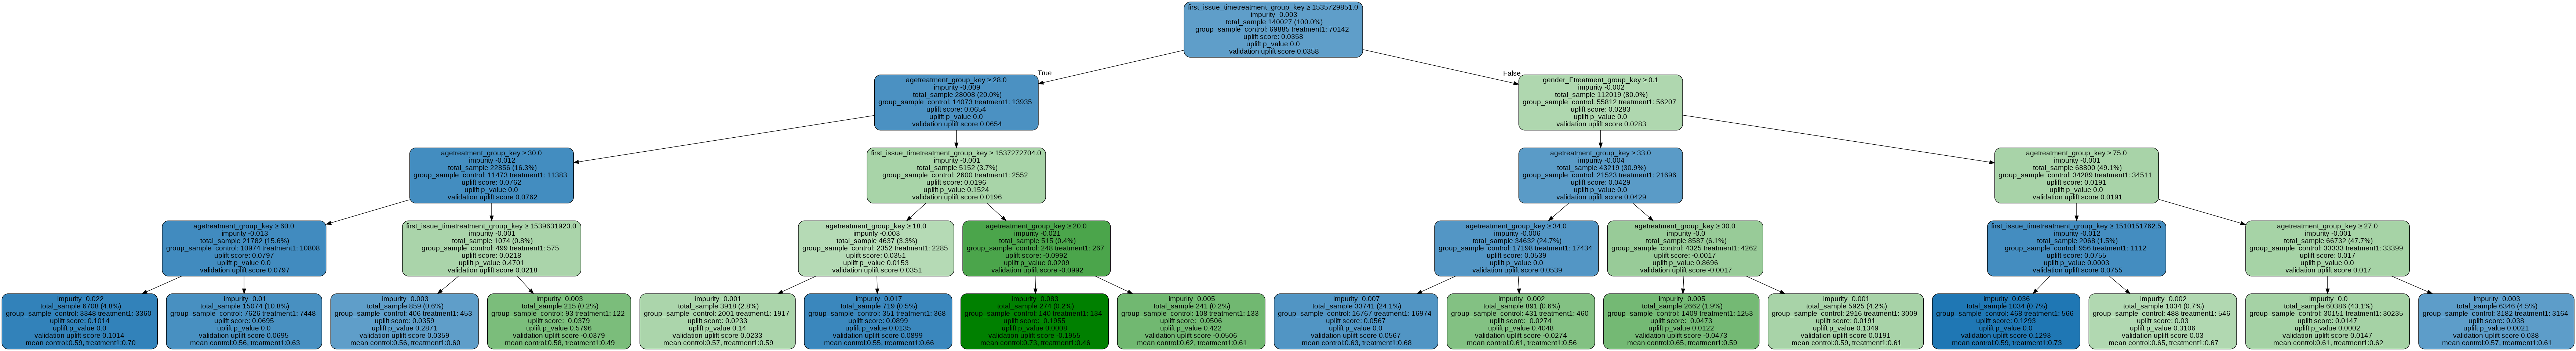

In [87]:

# Plot uplift tree
graph = uplift_tree_plot(uplift_tree.fitted_uplift_tree,X_train_tree.columns)
display(Image(graph.create_png()))

Соберем пайплайн из uplift модели:

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin


class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if len(self.column)==1:
          return X[:,self.column].reshape( -1,1)
        else:
          return X[:, self.column]  

In [89]:
from joblib import Parallel, delayed
from sklearn.pipeline import FeatureUnion, _fit_transform_one, _transform_one
from scipy import sparse

Классы для работы с pandas DataFrame на этапе обработки признаков

In [90]:
class PandasFeatureUnion(FeatureUnion):
    '''
    применить разные преобразования к разным столбцам,
    а затем объединить их вместе для дальнейшей обработки / процесса машинного обучения
    '''
    def fit_transform(self, X, y=None, **fit_params):
        self._validate_transformers()
        result = Parallel(n_jobs=self.n_jobs)(
            delayed(_fit_transform_one)(
                transformer=trans,
                X=X,
                y=y,
                weight=weight,
                **fit_params)
            for name, trans, weight in self._iter())

        if not result:
            # All transformers are None
            return np.zeros((X.shape[0], 0))
        Xs, transformers = zip(*result)
        self._update_transformer_list(transformers)
        if any(sparse.issparse(f) for f in Xs):
            Xs = sparse.hstack(Xs).tocsr()
        else:
            Xs = self.merge_dataframes_by_column(Xs)
        return Xs

    def merge_dataframes_by_column(self, Xs):
        return pd.concat(Xs, axis="columns", copy=False)

    def transform(self, X):
        Xs = Parallel(n_jobs=self.n_jobs)(
            delayed(_transform_one)(
                transformer=trans,
                X=X,
                y=None,
                weight=weight)
            for name, trans, weight in self._iter())
        if not Xs:
            # All transformers are None
            return np.zeros((X.shape[0], 0))
        if any(sparse.issparse(f) for f in Xs):
            Xs = sparse.hstack(Xs).tocsr()
        else:
            Xs = self.merge_dataframes_by_column(Xs)
        return Xs
    
    
class FeatureSelectorPd(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        print(self.column)
        return X[self.column]


    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        print('ohe')
        result = pd.get_dummies(X, prefix=self.key)
        for col_ in self.columns:
            if col_ not in result.columns:
                result[col_] = 0
        return result[self.columns]

Результаты работы остаются Pandas DataFrame

In [91]:
from sklearn.pipeline import Pipeline

encoder1 =Pipeline([('ohe',OHEEncoder(['gender']))])
# собираем оценщик для uplift
estimator = CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True)
# uplift модель
ct = ClassTransformation(estimator=estimator)



# полный пайплайн
my_pipeline = Pipeline([
    ('encoder', PandasFeatureUnion([('1',encoder1)])),
    ('model',ct)
])

# учим модель

my_pipeline = my_pipeline.fit(   X=X_train, y = y_train, model__treatment=treat_train)


ohe


Оценим результат

In [92]:

uplift_predictions = my_pipeline.predict(X_val)

uplift_30 = uplift_at_k(y_val, uplift_predictions, treat_val, strategy='overall')
print(f'uplift@30%: {uplift_30:.4f}')

ohe
uplift@30%: 0.0517


Сохраним результат:

In [93]:

models_results['approach'].append('ClassTransformation-pipeline')
models_results['uplift@30%'].append(uplift_30)


In [94]:
pd.DataFrame(data=models_results).sort_values('uplift@30%', ascending=False)

,approach,uplift@30%
1,ClassTransformation,0.061775
6,ClassTransformation-pipeline,0.051737
2,TwoModels,0.051443
0,SoloModel,0.041614
5,TreeModels,0.039946
3,TreeModels,0.039287
4,Tree,0.039287


### Домашнее задание

1. скачать набор данных маркетинговых кампаний отсюда https://www.kaggle.com/davinwijaya/customer-retention

In [125]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split

path = '/Users/svetlanaskobeltcyna/Edu/ML_in_business/lesson_4/'

df = pd.read_csv(path +'data.csv')

df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


In [126]:
df['offer'].unique()

array(['Buy One Get One', 'No Offer', 'Discount'], dtype=object)

2. там поле conversion - это целевая переменная, а offer - коммуникация. Переименовать поля (conversion -> target, offer -> treatment) и привести поле treatment к бинарному виду (1 или 0, т.е было какое-то предложение или нет) - значение No Offer означает отсутствие коммуникации, а все остальные - наличие.

In [127]:
df.rename(columns = {'conversion': 'target', 'offer': 'treatment'}, inplace = True)
df['treatment'] = np.where(df['treatment'] == 'No Offer', 0, 1)

In [128]:
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,treatment,target
0,10,142.44,1,0,Surburban,0,Phone,1,0
1,6,329.08,1,1,Rural,1,Web,0,0
2,7,180.65,0,1,Surburban,1,Web,1,0
3,9,675.83,1,0,Rural,1,Web,1,0
4,2,45.34,1,0,Urban,0,Web,1,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,1,0
63996,5,38.91,0,1,Urban,1,Phone,1,0
63997,6,29.99,1,0,Urban,1,Phone,1,0
63998,1,552.94,1,0,Surburban,1,Multichannel,1,0


In [129]:
df.groupby("treatment")['target'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,21306.0,0.106167,0.308059,0.0,0.0,0.0,0.0,1.0
1,42694.0,0.167049,0.373024,0.0,0.0,0.0,0.0,1.0


3. сделать разбиение набора данных не тренировочную и тестовую выборки

In [130]:
features = ['recency', 'history', 'used_discount', 'used_bogo', 'zip_code', 'is_referral', 'channel']

X = df[features]
y = df['target']
treat = df['treatment']


indices_train, indices_test = train_test_split(df.index, test_size=0.3, random_state=13)

X_train = X.loc[indices_train]
y_train = y.loc[indices_train]
treat_train = treat.loc[indices_train]


X_test = X.loc[indices_test]

models_results = {
    'approach': [],
    'uplift@30%': []
}

4. сделать feature engineering на ваше усмотрение (допускается свобода выбора методов)

In [131]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]
   
    
from sklearn.preprocessing import StandardScaler


continuos_cols = ['recency', 'history']
cat_cols = ['zip_code', 'channel']
base_cols = ['used_discount', 'used_bogo', 'is_referral']


continuos_transformers = []
cat_transformers = []
base_transformers = []

for cont_col in continuos_cols:
    transfomer =  Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('standard', StandardScaler())
            ])
    continuos_transformers.append((cont_col, transfomer))
    
for cat_col in cat_cols:
    cat_transformer = Pipeline([
                ('selector', ColumnSelector(key=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    cat_transformers.append((cat_col, cat_transformer))
    
for base_col in base_cols:
    base_transformer = Pipeline([
                ('selector', NumberSelector(key=base_col))
            ])
    base_transformers.append((base_col, base_transformer))

In [132]:
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion(continuos_transformers+cat_transformers+base_transformers)
feature_processing = Pipeline([('feats', feats)])

feature_processing.fit_transform(X_train)

array([[-1.07851323, -0.82567357,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.9178729 ,  0.27048985,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.34747686, -0.41888205,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.63267488, -0.40413197,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.48826894, -0.37102194,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.34747686,  0.31932036,  0.        , ...,  0.        ,
         1.        ,  1.        ]])

5. провести uplift-моделирование 3 способами: одна модель с признаком коммуникации (S learner), модель с трансформацией таргета (трансформация классов п. 2. 1) и вариант с двумя независимыми моделями

uplift@30%: 0.0524


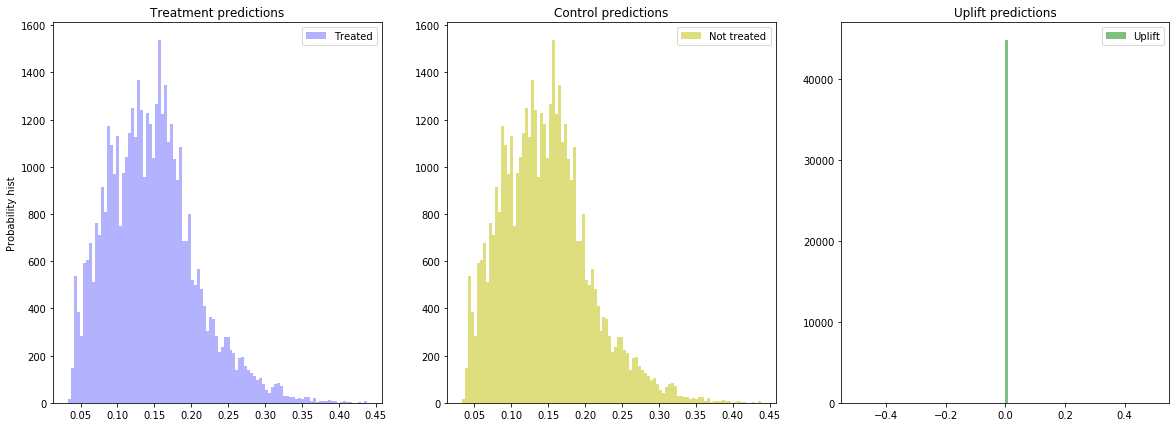

In [133]:
from sklift.metrics import uplift_at_k
from sklift.viz import plot_uplift_preds
from sklift.models import SoloModel

# sklift поддерживает любые модели, 
# которые удовлетворяют соглашениями scikit-learn
# Для примера воспользуемся catboost
from catboost import CatBoostClassifier

classifier = Pipeline([
    ('features',feats),
    ('classifier', CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True)),
])

sm = SoloModel(classifier)
sm = sm.fit(X_train, y_train, treat_train)

uplift_sm = sm.predict(X_train)

sm_score = uplift_at_k(y_true=y_train, uplift=uplift_sm, treatment=treat_train, strategy='by_group', k=0.3)
print(f'uplift@30%: {sm_score:.4f}')

models_results['approach'].append('SoloModel')
models_results['uplift@30%'].append(sm_score)

# Получим условные вероятности выполнения целевого действия при взаимодействии для каждого объекта
sm_trmnt_preds = sm.trmnt_preds_
# И условные вероятности выполнения целевого действия без взаимодействия для каждого объекта
sm_ctrl_preds = sm.ctrl_preds_

# Отрисуем распределения вероятностей и их разность (uplift)
plot_uplift_preds(trmnt_preds=sm_trmnt_preds, ctrl_preds=sm_ctrl_preds);

In [134]:
from sklift.models import ClassTransformation

ct = ClassTransformation(classifier)
ct = ct.fit(X_train, y_train, treat_train)

uplift_ct = ct.predict(X_train)

ct_score = uplift_at_k(y_true=y_train, uplift=uplift_ct, treatment=treat_train, strategy='by_group', k=0.3)

models_results['approach'].append('ClassTransformation')
models_results['uplift@30%'].append(ct_score)

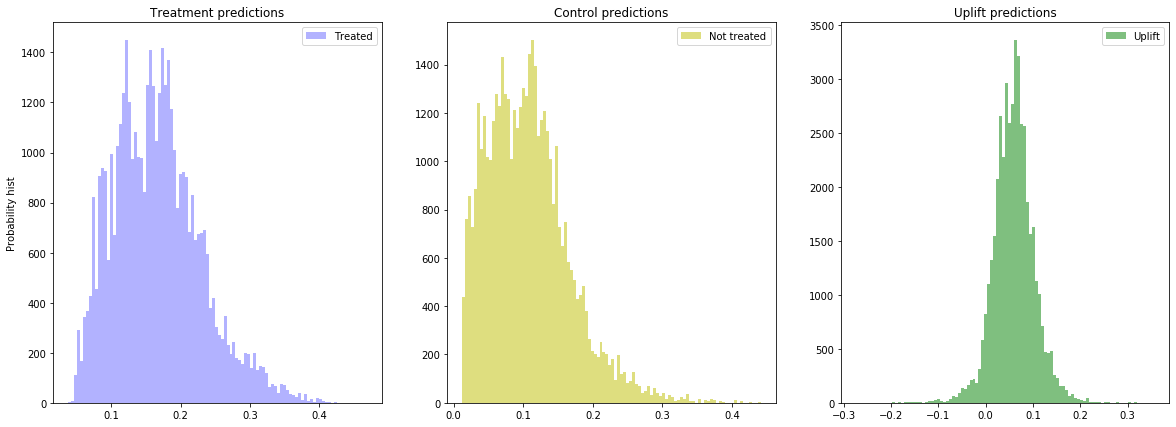

In [135]:
from sklift.models import TwoModels

classifier_trmnt = Pipeline([
    ('features',feats),
    ('classifier', CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True)),
])

classifier_ctrl = Pipeline([
    ('features',feats),
    ('classifier', CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True)),
])

tm = TwoModels(
    estimator_trmnt=classifier_trmnt, 
    estimator_ctrl=classifier_ctrl, 
    method='vanilla'
)

tm = tm.fit(X_train, y_train, treat_train)

uplift_tm = tm.predict(X_train)

tm_score = uplift_at_k(y_true=y_train, uplift=uplift_tm, treatment=treat_train, strategy='by_group', k=0.3)

models_results['approach'].append('TwoModels')
models_results['uplift@30%'].append(tm_score)

plot_uplift_preds(trmnt_preds=tm.trmnt_preds_, ctrl_preds=tm.ctrl_preds_);

6. в конце вывести единую таблицу сравнения метрик uplift@10%, uplift@20% этих 3 моделей

In [136]:
pd.DataFrame(data=models_results).sort_values('uplift@30%', ascending=False)

,approach,uplift@30%
2,TwoModels,0.128950
1,ClassTransformation,0.111410
0,SoloModel,0.052387


7. построить модель UpliftTreeClassifier и попытаться описать словами полученное дерево

8. (опционально) для модели S learner (модель с дополнительным признаком коммуникации) построить зависимость таргета (конверсии - поле conversion) от значения uplift: 1) сделать прогноз и получить uplift для тестовой выборки 2) отсортировать тестовую выборку по uplift по убыванию 3) разбить на децили (pandas qcut вам в помощь) 4) для каждого дециля посчитать среднюю conversion

9. (опционально) построить модель UpliftRandomForestClassifier и попытаться описать словами полученное дерево

https://ods.ai/tracks/open-source-soc2021/competitions/scikit-uplift-hack-soc2021

### Ссылки

1. https://towardsdatascience.com/a-quick-uplift-modeling-introduction-6e14de32bfe0
2. https://habr.com/ru/company/ru_mts/blog/485980/#reference1

3. https://en.wikipedia.org/wiki/Uplift_modelling
4. https://www.youtube.com/watch?v=yFQAIJBYXI0
5. https://www.youtube.com/watch?v=jCUcYiBK03I
6. https://www.uplift-modeling.com/en/latest/
7. https://arxiv.org/pdf/1809.04559.pdf
8. https://catboost.ai/docs/concepts/about.html
9. Метрики https://habr.com/ru/company/ru_mts/blog/538934/


### Библиотеки и пакеты

1. causalml
2. sklift
3. catboost